In [24]:
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import json
import itertools
import operator
import pandas as pd
with open('../comp_comm') as f:
    data = [json.loads(line) for line in f]

In [25]:
#step 1, take list of dictionaries, and produce list of pairs of dictionaries,
#where each pair has matching cat and size but different node
def split(data):
    return ([i for i in data if i['node']==99],[i for i in data if i['node']==31])
def keyfun(d):
    return (d['cat'],int(d['size']))
def group_similar(lst):
    sorter = sorted(lst, key=keyfun)
    grouper = itertools.groupby(sorter, keyfun)
    return {k:[i['t'] for i in g] for k,g in grouper}
def combine(one, two):
    return {k:(v,two.get(k,[])) for k,v in one.items()}
server, node = split(data)
combined = combine(group_similar(server), group_similar(node))
zipped = {k: list(zip(*v)) for k, v in combined.items()}
div = lambda a,b:a/b
divided = {k: [div(*i) for i in v] for k,v in zipped.items()}
flattened = list(itertools.chain(*[v for k,v in zipped.items()]))
df = pd.DataFrame(flattened, columns=['server', 'node'])

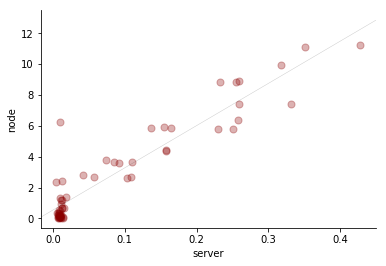

In [26]:
g = sns.regplot(x="server", y="node", data=df, ci = False,
    scatter_kws={"color":"darkred","alpha":0.3,"s":50},
    line_kws={"color":"k","alpha":0.2,"lw":0.5},marker="o")
sns.despine()

In [27]:
fig = g.get_figure()
fig.savefig('comp_comparison')